# Instacart - Report for Stakeholders

## Exercise 10 Coding Etiquette and Excel Reporting

### List of Contents
Libraries and Data shape

**1. Regional Segmentation**

Total customers by Division

Total customers by Region

Nan Values


**2. Analysing Spending Habits by Region**

Spending Flag (Low and High spenders)

Nan Values

Identifying High and Low spenders by Region


**3. Targeting the Market**

Region spending percentage (new column)

Low activity customers - Exclusion Flag

Metrics before and after exclusion flag


**4. Customer Profiling**

Defining Customer Profiles

Applying profiling to the data frame

Visualization -Family by age vs Customer Profile










In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing df3_merged. Including "family_by_age" column
df3_merged= pd.read_pickle(os.path.join(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\02 Data\Prepared Data\4.9 POC_merged_fam.pkl'))

In [3]:
df3_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Prior_merge', 'price_range',
       'price_range_loc', 'busiest_day', 'Top_days_for_order_frequency',
       'busiest_period', 'max_order', 'loyalty_flag', 'spending_flag',
       'frequency_flag', 'Last Name', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'family_by_age'],
      dtype='object')

In [4]:
#Removing PII data
POC3= df3_merged.drop(columns=['Last Name'])

In [5]:
#Looking for duplicates
POC3.duplicated().sum()

np.int64(0)

In [6]:
POC3.shape

(22705106, 31)

In [7]:
POC3.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,family_by_age
0,1977647.0,138.0,30.0,6.0,17.0,20.0,1,1.0,1.0,Chocolate Sandwich Cookies,...,Low spender,Regular customer,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Senior Adults
1,1813452.0,764.0,3.0,4.0,17.0,9.0,1,11.0,1.0,Chocolate Sandwich Cookies,...,Low spender,Frequent customer,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mature Adults
2,1701441.0,777.0,16.0,1.0,7.0,26.0,1,7.0,0.0,Chocolate Sandwich Cookies,...,Low spender,Non-frequent customer,Female,Hawaii,51.0,1/4/2019,2.0,married,57797.0,Mature Adults
3,1290456.0,910.0,12.0,3.0,10.0,30.0,1,1.0,0.0,Chocolate Sandwich Cookies,...,Low spender,Non-frequent customer,Female,Tennessee,65.0,7/25/2019,0.0,divorced/widowed,44856.0,Mature Adults
4,369558.0,1052.0,10.0,1.0,20.0,19.0,1,1.0,0.0,Chocolate Sandwich Cookies,...,Low spender,Regular customer,Male,Oregon,72.0,3/30/2018,1.0,married,153843.0,Senior Adults


### 1. Regional Segmentation

New Column: "Regions"
1. Northeast
2. Midwest
3. South
4. West

New Variables: "Divisions"
1. New England
2. Middle Atlantic
3. East North Central
4. West North Central
5. South Atlantic
6. East South Centeal
7. West South Central
8. Mountain
9. Pacific

In [8]:
#States to Division Dictionary 
state_to_division = {
    # New England
    'Maine': 'New England',
    'New Hampshire': 'New England',
    'Vermont': 'New England',
    'Massachusetts': 'New England',
    'Rhode Island': 'New England',
    'Connecticut': 'New England',

    # Middle Atlantic
    'New York': 'Middle Atlantic',
    'New Jersey': 'Middle Atlantic',
    'Pennsylvania': 'Middle Atlantic',

    # East North Central
    'Ohio': 'East North Central',
    'Indiana': 'East North Central',
    'Illinois': 'East North Central',
    'Michigan': 'East North Central',
    'Wisconsin': 'East North Central',

    # West North Central
    'Minnesota': 'West North Central',
    'Iowa': 'West North Central',
    'Missouri': 'West North Central',
    'North Dakota': 'West North Central',
    'South Dakota': 'West North Central',
    'Nebraska': 'West North Central',
    'Kansas': 'West North Central',

    # South Atlantic
    'Delaware': 'South Atlantic',
    'Maryland': 'South Atlantic',
    'District of Columbia': 'South Atlantic',
    'Virginia': 'South Atlantic',
    'West Virginia': 'South Atlantic',
    'North Carolina': 'South Atlantic',
    'South Carolina': 'South Atlantic',
    'Georgia': 'South Atlantic',
    'Florida': 'South Atlantic',

    # East South Central
    'Kentucky': 'East South Central',
    'Tennessee': 'East South Central',
    'Mississippi': 'East South Central',
    'Alabama': 'East South Central',

    # West South Central
    'Arkansas': 'West South Central',
    'Louisiana': 'West South Central',
    'Oklahoma': 'West South Central',
    'Texas': 'West South Central',

    # Mountain
    'Montana': 'Mountain',
    'Idaho': 'Mountain',
    'Wyoming': 'Mountain',
    'Colorado': 'Mountain',
    'New Mexico': 'Mountain',
    'Arizona': 'Mountain',
    'Utah': 'Mountain',
    'Nevada': 'Mountain',

    # Pacific
    'Washington': 'Pacific',
    'Oregon': 'Pacific',
    'California': 'Pacific',
    'Alaska': 'Pacific',
    'Hawaii': 'Pacific'
}


In [9]:
#Mapping to Dataframe
POC3['Division']= POC3 ['State'].map(state_to_division)

In [10]:
#Test
POC3[POC3['Division'].isna()]['State'].value_counts()

Series([], Name: count, dtype: int64)

Total customers by Division

In [11]:
POC3['Division'].value_counts(dropna=False)

Division
South Atlantic        3996898
Mountain              3560211
West North Central    3118261
New England           2656991
Pacific               2250419
East North Central    2206553
West South Central    1797150
East South Central    1765737
Middle Atlantic       1352880
NaN                         6
Name: count, dtype: int64

In [12]:
POC3.to_pickle(os.path.join(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\02 Data\Prepared Data\4.10 POC_division.pkl'))

In [13]:
# Divisions to Regions Dictionary
division_to_region = {
    # Northeast
    'New England': 'Northeast', 'Middle Atlantic':'Northeast',
    # Midwest
    'East North Central':'Midwest', 'West North Central':'Midwest',
    # South
    'South Atlantic':'South', 'East South Central':'South', 'West South Central':'South',
    # West
    'Mountain':'West', 'Pacific':'West'}

In [14]:
#Mapping to Dataframe
POC3['Region']= POC3 ['Division'].map(division_to_region)

In [15]:
POC3.loc[POC3['Region'].isna(),['Division']].value_counts()

Series([], Name: count, dtype: int64)

Total Customers by Region

In [16]:
#Test
POC3['Region'].value_counts(dropna=False)

Region
South        7559785
West         5810630
Midwest      5324814
Northeast    4009871
NaN                6
Name: count, dtype: int64

In [17]:
POC3.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,family_by_age,Division,Region
0,1977647.0,138.0,30.0,6.0,17.0,20.0,1,1.0,1.0,Chocolate Sandwich Cookies,...,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Senior Adults,West North Central,Midwest
1,1813452.0,764.0,3.0,4.0,17.0,9.0,1,11.0,1.0,Chocolate Sandwich Cookies,...,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mature Adults,East North Central,Midwest
2,1701441.0,777.0,16.0,1.0,7.0,26.0,1,7.0,0.0,Chocolate Sandwich Cookies,...,Female,Hawaii,51.0,1/4/2019,2.0,married,57797.0,Mature Adults,Pacific,West
3,1290456.0,910.0,12.0,3.0,10.0,30.0,1,1.0,0.0,Chocolate Sandwich Cookies,...,Female,Tennessee,65.0,7/25/2019,0.0,divorced/widowed,44856.0,Mature Adults,East South Central,South
4,369558.0,1052.0,10.0,1.0,20.0,19.0,1,1.0,0.0,Chocolate Sandwich Cookies,...,Male,Oregon,72.0,3/30/2018,1.0,married,153843.0,Senior Adults,Pacific,West


In [18]:
#Checking Nan Values
POC3.loc[POC3['Division'].isna() & POC3['Region'].isna(), ['order_id','user_id','product_id','product_name','State','Division','Region']]

,order_id,user_id,product_id,product_name,State,Division,Region
1238413,NaN,nan,3718,Wasabi Cheddar Spreadable Cheese,NaN,NaN,NaN
2830417,NaN,nan,7045,Unpeeled Apricot Halves in Heavy Syrup,NaN,NaN,NaN
11390794,NaN,nan,25383,Chocolate Go Bites,NaN,NaN,NaN
12466412,NaN,nan,27499,Non-Dairy Coconut Seven Layer Bar,NaN,NaN,NaN
19628322,NaN,nan,43725,Sweetart Jelly Beans,NaN,NaN,NaN
20763663,NaN,nan,45971,12 Inch Taper Candle White,NaN,NaN,NaN


In [19]:
#Exporting Dataframe POC_region
POC3.to_pickle(os.path.join(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\02 Data\Prepared Data\4.10 POC_region.pkl'))

### 2. Identifying Spending Habits by Region

In [20]:
#Crossing variableRegion with "spending flag"
POC3['spending_flag'].value_counts(dropna=False)

spending_flag
Low spender     15321302
High spender     7362740
NaN                21064
Name: count, dtype: int64

In [21]:
#Grouping the data by "spending_flag" and calculating descriptive statistics for Region
region_stats = POC3.groupby('spending_flag')['Region'].describe()

In [22]:
region_stats

,count,unique,top,freq
spending_flag,,,,
High spender,7362738,4,South,2455234
Low spender,15321298,4,South,5097516


In [23]:
#Identifying spending flag "Nan Values"
POC3.loc[POC3['spending_flag'].isna(),[ 'user_id','days_since_prior_order','order_hour_of_day','reordered','orders_day_of_week','product_id','State','Division','Region','spending_flag']]

,user_id,days_since_prior_order,order_hour_of_day,reordered,orders_day_of_week,product_id,State,Division,Region,spending_flag
8108,28.0,2.0,16.0,0.0,0.0,34,North Carolina,South Atlantic,South,NaN
8109,183.0,9.0,19.0,0.0,0.0,34,Ohio,East North Central,Midwest,NaN
8110,202.0,30.0,10.0,0.0,0.0,34,West Virginia,South Atlantic,South,NaN
8111,236.0,3.0,0.0,0.0,0.0,34,Oregon,Pacific,West,NaN
8112,236.0,2.0,23.0,1.0,2.0,34,Oregon,Pacific,West,NaN
...,...,...,...,...,...,...,...,...,...,...
18215180,196251.0,NaN,8.0,0.0,5.0,40440,Arizona,Mountain,West,NaN
18215181,203020.0,6.0,16.0,0.0,1.0,40440,Rhode Island,New England,Northeast,NaN
18215182,203530.0,2.0,13.0,0.0,3.0,40440,Rhode Island,New England,Northeast,NaN
18215183,203530.0,7.0,13.0,1.0,2.0,40440,Rhode Island,New England,Northeast,NaN


In [24]:
#Counts and total customers by region
POC3.groupby('Region').agg(total_customers=('spending_flag','count'), high_spenders=('spending_flag', lambda x: (x == 'High spender').sum()))

,total_customers,high_spenders
Region,,
Midwest,5320137,1728126
Northeast,4005898,1296996
South,7552750,2455234
West,5805251,1882382


**New Variable: region_spending**

In [25]:
region_spending= POC3.groupby(['Region','spending_flag']).size().unstack(fill_value=0)

In [26]:
region_spending

spending_flag,High spender,Low spender
Region,,
Midwest,1728126,3592011
Northeast,1296996,2708902
South,2455234,5097516
West,1882382,3922869


In [27]:
#Test
POC3.groupby('spending_flag')['Region'].value_counts()

spending_flag  Region   
High spender   South        2455234
               West         1882382
               Midwest      1728126
               Northeast    1296996
Low spender    South        5097516
               West         3922869
               Midwest      3592011
               Northeast    2708902
Name: count, dtype: int64

Spending habits across U.S. regions are not markedly different, suggesting that regional differences do not strongly influence whether a customer is a high or low spender. The South Region has the highest concentration of high spenders, whereas the Northeast shows primarily low spenders.  The South and West regions contribute the largest number of customers overall, including both high- and low-spending customers.  Northeast consistently has the smallest customer base.

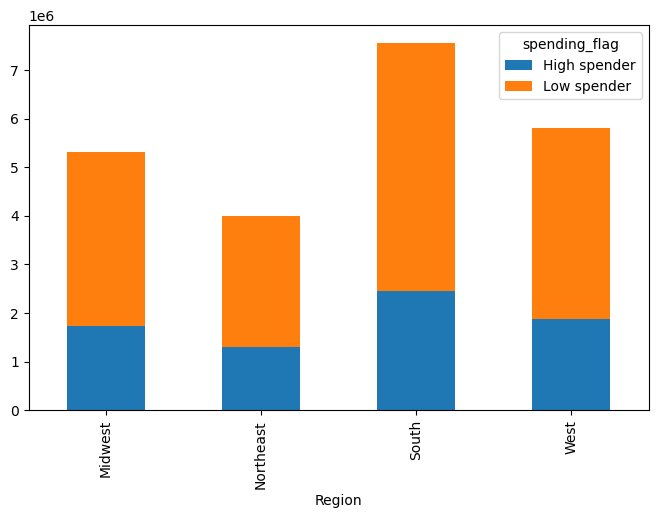

In [28]:
bar1=region_spending.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

In [29]:
#Calculating Region spending percentage
region_spending_pct = region_spending.div(region_spending.sum(axis=1),axis=0)

In [30]:
region_spending_pct

spending_flag,High spender,Low spender
Region,,
Midwest,0.324827,0.675173
Northeast,0.323772,0.676228
South,0.325078,0.674922
West,0.324255,0.675745


<Axes: xlabel='Region'>

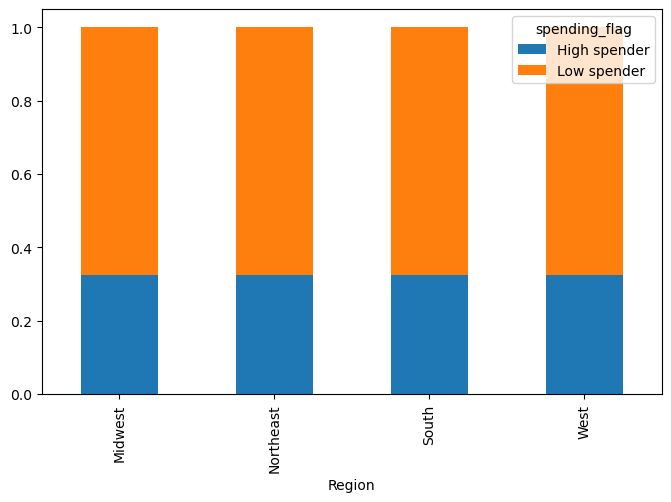

In [31]:
region_spending_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)


Overall distribution of spenders: The Low spenders account for roughly 67-68% and the High spenders account for roughly 32 - 33%

The South has the slightly highest proportion of high spenders (32.51%)

The Northeast has the slightly lowest (32.38%)

Differences are negligible (<0.2%)

**Conclusion:** Spending behavior is homogeneous across regions. Region alone is not a strong predictor of spending level.


### 3. Targeting the Market

a. Exclusion Flag: Customers with fewer than 5 orders

In [32]:
# Exclusion Flag: Customers with fewer than five orders
order_counts = (POC3.groupby('user_id').size())

In [33]:
# True: will be excluded.  False: will be included.
exclusion_flag = ((order_counts <5).rename('exclude_under_5_orders'))

In [34]:
#Merging the flag
POC3 = POC3.merge(exclusion_flag, on= 'user_id', how= 'left')

In [35]:
POC3[['user_id', 'exclude_under_5_orders']].head()

,user_id,exclude_under_5_orders
0,138.0,False
1,764.0,False
2,777.0,False
3,910.0,False
4,1052.0,False


In [36]:
#Test Distribution
POC3['exclude_under_5_orders'].value_counts()

exclude_under_5_orders
False    22697214
True         7892
Name: count, dtype: int64

In [37]:
#Customer-level logic
POC3.groupby('user_id')['exclude_under_5_orders'].nunique().value_counts()

exclude_under_5_orders
1    206192
Name: count, dtype: int64

### Identifying Low Activity Customers

In [38]:
#Identifying excluded customers 
excluded_customers = POC3.loc[POC3['exclude_under_5_orders'] ==True]

In [39]:
excluded_customers['fam_status'].unique()


array(['married', 'single', 'divorced/widowed',
       'living with parents and siblings'], dtype=object)

In [40]:
POC3['loyalty_flag'].unique()

array(['Regular customer', 'New customer', 'Loyal customer', nan],
      dtype=object)

In [41]:
POC3.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,n_dependants,fam_status,income,family_by_age,Division,Region,exclude_under_5_orders
0,1977647.0,138.0,30.0,6.0,17.0,20.0,1,1.0,1.0,Chocolate Sandwich Cookies,...,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Senior Adults,West North Central,Midwest,False
1,1813452.0,764.0,3.0,4.0,17.0,9.0,1,11.0,1.0,Chocolate Sandwich Cookies,...,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mature Adults,East North Central,Midwest,False
2,1701441.0,777.0,16.0,1.0,7.0,26.0,1,7.0,0.0,Chocolate Sandwich Cookies,...,Hawaii,51.0,1/4/2019,2.0,married,57797.0,Mature Adults,Pacific,West,False
3,1290456.0,910.0,12.0,3.0,10.0,30.0,1,1.0,0.0,Chocolate Sandwich Cookies,...,Tennessee,65.0,7/25/2019,0.0,divorced/widowed,44856.0,Mature Adults,East South Central,South,False
4,369558.0,1052.0,10.0,1.0,20.0,19.0,1,1.0,0.0,Chocolate Sandwich Cookies,...,Oregon,72.0,3/30/2018,1.0,married,153843.0,Senior Adults,Pacific,West,False


In [42]:
#Exporting Excluded customers
excluded_customers.to_csv(os.path.join(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\02 Data\Prepared Data\4.10 POC.excluded customers.csv'))

In [43]:
#Included customers
POC3_included = POC3.loc[POC3['exclude_under_5_orders'] == False]

In [44]:
#Exporting included customers
POC3.to_csv(os.path.join(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\02 Data\Prepared Data\4.10 POC_included customers.csv'))

In [45]:
#Exporting included customers
POC3.to_pickle(os.path.join(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\02 Data\Prepared Data\4.10 POC_included customers.pkl'))

In [4]:
#Importing included customers
POC3= pd.read_pickle(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\02 Data\Prepared Data\4.10 POC_included customers.pkl')

**Comparing Customers before and after exclusion flag**

In [47]:
#Metrics - comparison of customers 
comparison_customers = pd.DataFrame({
    'before_exclusion': [POC3['user_id'].nunique()],
    'after_exclusion':  [POC3_included['user_id'].nunique()]
}, index=['unique_customers'])

comparison_customers['difference'] = (
    comparison_customers['after_exclusion']
    - comparison_customers['before_exclusion']
)

comparison_customers['pct_change'] = (
    comparison_customers['difference']
    / comparison_customers['before_exclusion'] * 100
).round(2)


In [48]:
comparison_customers

,before_exclusion,after_exclusion,difference,pct_change
unique_customers,206192,203688,-2504,-1.21


Comparison of Order's Count before and after exclusion:

In [49]:
#Order counts
comparison_orders = pd.DataFrame({
    'before_exclusion': [len(POC3)],
    'after_exclusion':  [len(POC3_included)]
}, index=['total_orders'])

comparison_orders['difference'] = (
    comparison_orders['after_exclusion']
    - comparison_orders['before_exclusion']
)

comparison_orders['pct_change'] = (
    comparison_orders['difference']
    / comparison_orders['before_exclusion'] * 100
).round(2)



In [50]:
comparison_orders

,before_exclusion,after_exclusion,difference,pct_change
total_orders,22705106,22697214,-7892,-0.03


Average number of orders per customer before and after exclusion:

In [51]:
#Avg orders
avg_orders = pd.DataFrame({
    'before_exclusion': [
        POC3.groupby('user_id').size().mean()
    ],
    'after_exclusion': [
        POC3_included.groupby('user_id').size().mean()
    ]
}, index=['avg_orders_per_customer'])

avg_orders['difference'] = (
    avg_orders['after_exclusion']
    - avg_orders['before_exclusion']
)

avg_orders['pct_change'] = (
    avg_orders['difference']
    / avg_orders['before_exclusion'] * 100
).round(2)
avg_orders



,before_exclusion,after_exclusion,difference,pct_change
avg_orders_per_customer,110.116328,111.431277,1.314949,1.19


Regional Distribution

In [52]:
#Did excluding low_activity customers affect the Regional distribution?
region_before = (
    POC3['Region']
    .value_counts(normalize=True)
    .rename('before_exclusion')
)


In [53]:
region_after = (POC3_included['Region'].value_counts(normalize=True).rename('after_exclusion'))

In [54]:
region_comparison = pd.concat(
    [region_before, region_after],
    axis=1
).fillna(0)

region_comparison


,before_exclusion,after_exclusion
Region,,
South,0.332955,0.332949
West,0.255917,0.255917
Midwest,0.234521,0.234527
Northeast,0.176607,0.176607


In [55]:
region_comparison['difference'] = (
    region_comparison['after_exclusion']
    - region_comparison['before_exclusion']
)

region_comparison['pct_change'] = (
    region_comparison['difference']
    / region_comparison['before_exclusion']
    .replace(0, pd.NA) * 100
).round(2)

region_comparison

,before_exclusion,after_exclusion,difference,pct_change
Region,,,,
South,0.332955,0.332949,-6.490499e-06,-0.0
West,0.255917,0.255917,3.084369e-08,0.0
Midwest,0.234521,0.234527,6.028789e-06,0.0
Northeast,0.176607,0.176607,4.308660e-07,0.0


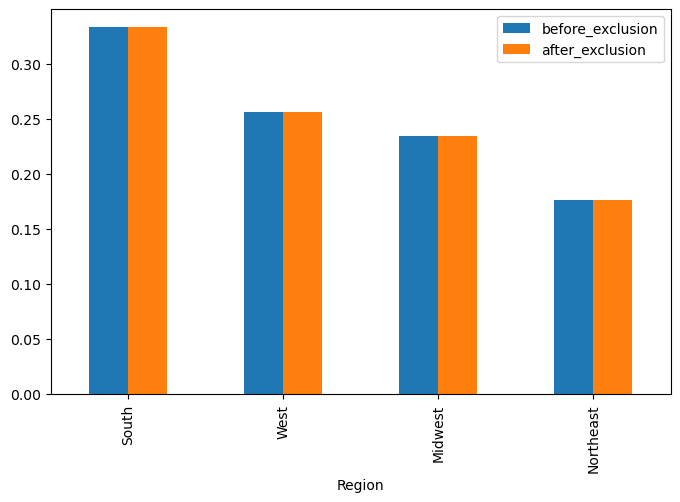

In [56]:
bar= region_comparison[['before_exclusion', 'after_exclusion']].plot(
    kind='bar',
    figsize=(8,5)
)


In [57]:
#Exporting bar.region_comparison
bar.figure.savefig(os.path.join(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\04 Analysis\Visualizations\Comparing_Regions.png'))

There is a slight difference after excluding those customers with low activity.  The Regional representation remains stable before and after applying the exclusion flag.

### 4. Customer Profiling

Customer profiling combines life stage (age), household context, and purchasing behavior. We are including the following variables:

Age group (family_by_age)

Dependents (n_dependants)

Family Status

Loyalty Level

### Customers Profile

**1. Young Single Adults**

Young Adults (<=33)

No dependents

Single, living with parents and siblings

New customer, Regular customer


**2. Single Parent**

Young Adults (<=33)

1 or more dependents

Single, living with parents and siblings

New customer, Regular customer


**3. New Couples**

Young Adults (<33)

No dependents

Married

New customer, Regular customer


**4. Family Builder**

Young, Mature, and Senior Adults 

1 or more dependents

Married

New customer, Regular customer


**5. High-value Professional**

Young, Mature, and Senior Adults

No dependents

Single, Divorced/widowed

Loyal customer

**6. Loyal Family**

Young, Mature, and Senior Adults

One or more dependents

Married, Divorced/widowed

Loyal customer

**7. Senior Shopper**

Senior adults (66+)

Not included in other classifications


In [5]:
POC3.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Prior_merge', 'price_range',
       'price_range_loc', 'busiest_day', 'Top_days_for_order_frequency',
       'busiest_period', 'max_order', 'loyalty_flag', 'spending_flag',
       'frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'family_by_age', 'Division',
       'Region', 'exclude_under_5_orders'],
      dtype='object')

In [11]:
def customer_profile(row):

    age_group = row.get('family_by_age')
    deps = row.get('n_dependants')
    loyalty = row.get('loyalty_flag')
    status = row.get('fam_status')

    if( 
        age_group == 'Young Adults' and 
        deps == 0 and
        loyalty in ['New customer', 'Regular customer'] and
        status in ['single', 'living with parents and siblings']):
        return 'Young Single Adult'
        
    elif (
        age_group == 'Young Adults' and
        deps > 0 and
        loyalty in ['New customer', 'Regular customer'] and
        status in ['single', 'living with parents and siblings']):
        return 'Single Parent'

    elif (
        age_group == 'Young Adults' and
        deps == 0 and
        loyalty in ['New customer', 'Regular customer'] and
        status == 'married'):
        return 'New Couple'
    
    elif (
        age_group in ['Young Adults', 'Mature Adult', 'Senior Adults'] and
        deps > 0 and
        loyalty in ['New customer', 'Regular customer'] and
        status in ['married', 'divorced/widowed']):
        return 'Family Builder'

    elif (  
        age_group in ['Young Adults', 'Mature Adult', 'Senior Adults'] and
        deps == 0 and
        loyalty == 'Loyal customer' and
        status in ['single', 'divorced/widowed']):
        return 'High-value customer'

    elif (  
        age_group in ['Young Adults', 'Mature Adult', 'Senior Adults'] and
        deps > 0 and
        loyalty == 'Loyal customer' and
        status in ['married', 'divorced/widowed']):
        return 'Loyal Family'
    
    elif (
        age_group =='Senior Adults'):
        return 'Senior Shopper'
    
    else:
        return 'Other' 

In [12]:
customer_profile

<function __main__.customer_profile(row)>

In [13]:
POC3['customer_profile'] = POC3.apply(customer_profile, axis=1)

In [14]:
POC4=POC3

In [15]:
POC4.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Prior_merge', 'price_range',
       'price_range_loc', 'busiest_day', 'Top_days_for_order_frequency',
       'busiest_period', 'max_order', 'loyalty_flag', 'spending_flag',
       'frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'family_by_age', 'Division',
       'Region', 'exclude_under_5_orders', 'customer_profile'],
      dtype='object')

In [16]:
POC4.shape

(22705106, 35)

### Applying the profile to dataframe

In [34]:
#Creating a mask to avoid double-counting senior shoppers
senior_already_classified = (
    (POC3['family_by_age'] == 'Senior Adults') &
    
    (  # Added outer parentheses to group all conditions
        (
            (POC4['n_dependants'] > 0) &
            (POC4['loyalty_flag'].isin(['New customer', 'Regular customer'])) &
            (POC4['fam_status'].isin(['married', 'divorced/widowed']))  # Fixed missing closing parenthesis
        )
        
        | # Added logical OR operator between condition groups
        
        (
            (POC4['n_dependants'] == 0) &
            (POC4['loyalty_flag'] == 'Loyal customer') &
            (POC4['fam_status'].isin(['single', 'divorced/widowed']))
        )
        
        | # Added logical OR operator between condition groups
        
        (
            (POC4['n_dependants'] > 0) &
            (POC4['loyalty_flag'] == 'Loyal customer')
        )
    )
)

In [39]:
conditions = [

    # Young Single Adult
    (
        (POC4['family_by_age'] == 'Young Adults') &
        (POC4['n_dependants'] == 0) &
        (POC4['loyalty_flag'].isin(['New customer', 'Regular customer'])) &
        (POC4['fam_status'].isin(['single', 'living with parents and siblings']))
    ),

    # Single Parent
    (
        (POC4['family_by_age'] == 'Young Adults') &
        (POC4['n_dependants'] > 0) &
        (POC4['loyalty_flag'].isin(['New customer', 'Regular customer'])) &
        (POC4['fam_status'].isin(['single', 'living with parents and siblings']))
    ),

    # Family Builder
    (
        (POC4['family_by_age'].isin(['Young Adults', 'Mature Adults', 'Senior Adults'])) &
        (POC4['n_dependants'] > 0) &
        (POC4['loyalty_flag'].isin(['New customer', 'Regular customer'])) &
        (POC4['fam_status'].isin(['married', 'divorced/widowed']))  # Added missing closing parenthesis here
    ),

    # High-Value Professional
    (
        (POC4['family_by_age'].isin(['Young Adults', 'Mature Adults', 'Senior Adults'])) &
        (POC4['n_dependants'] == 0) &
        (POC4['loyalty_flag']== 'Loyal customer') &
        (POC4['fam_status'].isin(['single', 'divorced/widowed']))
    ),

     # Loyal Family
    (
        (POC4['family_by_age'].isin(['Young Adults', 'Mature Adults', 'Senior Adults'])) &
        (POC4['n_dependants'] > 0) &
        (POC4['loyalty_flag']== 'Loyal customer') &
        (POC4['fam_status'].isin(['married', 'divorced/widowed']))  # Added square brackets around values
    ),

    # Senior Shopper
    (
        (POC4['family_by_age'] == 'Senior Adults') & (senior_already_classified)
    )
]

In [40]:
choices=[
    'Young Single Adult',
    'Single Parent',
    'High-value Professional',
    'Family Builder',
    'Loyal Family',
    'Senior Shopper']

In [41]:
POC4['customer_profile'] = np.select(
    conditions,
    choices,
    default= 'other'
)

In [42]:
POC4['customer_profile'].value_counts()

customer_profile
High-value Professional    10899984
Loyal Family                5045657
other                       3227531
Family Builder              1813391
Young Single Adult           976899
Single Parent                741644
Name: count, dtype: int64

In [43]:
#Cross-check
pd.crosstab(POC4['family_by_age'], POC4['customer_profile'])

customer_profile,Family Builder,High-value Professional,Loyal Family,Single Parent,Young Single Adult,other
family_by_age,,,,,,
Mature Adults,926744,5801804,2693356,0,0,1926369
Senior Adults,443020,2904787,1363110,0,0,955722
Young Adults,443627,2193393,989191,741644,976899,345434


In [44]:
POC4[['customer_profile', 'user_id', 'family_by_age', 'loyalty_flag']].groupby('customer_profile').nunique()

,user_id,family_by_age,loyalty_flag
customer_profile,,,
Family Builder,4267,3,1
High-value Professional,132956,3,2
Loyal Family,11940,3,1
Single Parent,8888,1,2
Young Single Adult,11922,1,2
other,36219,3,3


## Diagnosis - confirming values

In [45]:
POC4.loc[POC4['family_by_age'] == 'Young Adults', 'loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    2809443
Loyal customer      1778252
New customer        1102493
Name: count, dtype: int64

In [46]:
POC4.loc[POC4['family_by_age'] == 'Young Adults', 'fam_status'].value_counts(dropna=False)

fam_status
married                             3182584
single                              1420526
living with parents and siblings    1087078
Name: count, dtype: int64

In [47]:
POC4.loc[POC4['family_by_age'] == 'Young Adults', 'n_dependants'].value_counts(dropna=False)

n_dependants
3.0    1428939
2.0    1421793
0.0    1420526
1.0    1418930
Name: count, dtype: int64

In [48]:
#Exporting Customer Profiles
POC4.to_pickle(os.path.join(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\02 Data\Prepared Data\4.10 POC3_Customer_Profile.pkl'))

In [3]:
#Importing Customer Profiles
POC4 = pd.read_pickle(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\02 Data\Prepared Data\4.10 POC3_Customer_Profile.pkl')

### Visualizations
**Family_by_age vs Customer_profile**
"Do my customer profiles align with age segmentation?"

In [4]:
# 100% Stack bar chart
ct = pd.crosstab( POC4['family_by_age'],
                 POC4['customer_profile'],
                 normalize = 'index')

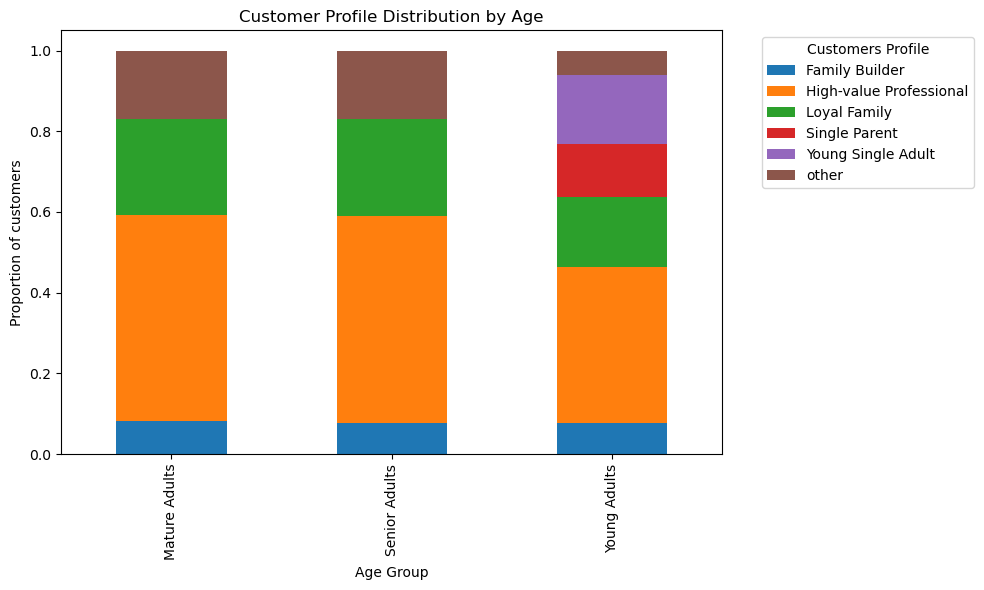

In [5]:
ct.plot( 
    kind= 'bar',
    stacked=True,
    figsize=(10,6))
plt.ylabel('Proportion of customers')
plt.xlabel('Age Group')
plt.title('Customer Profile Distribution by Age')
plt.legend(title='Customers Profile', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [12]:
plt.savefig(r'C:\Users\maryk\Desktop\DATA ANALYST\FINAL\2. IMMERSION FINALS\ACHIVEMENT 4 - Python\4.2 Instacart Basket Analysis\04 Analysis\Visualizations\customer_profile_distribution_by_age_2.png',
  bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

In [9]:
plt.show()

**Conclusion:** Young adults participate across all identified group profiles.  With a high percentage of High-value professionals, followed by Young single adults and Loyal families.

Mature and Senior Adults are split across High-value, Loyal Families, and Other customers.

**Heat map**

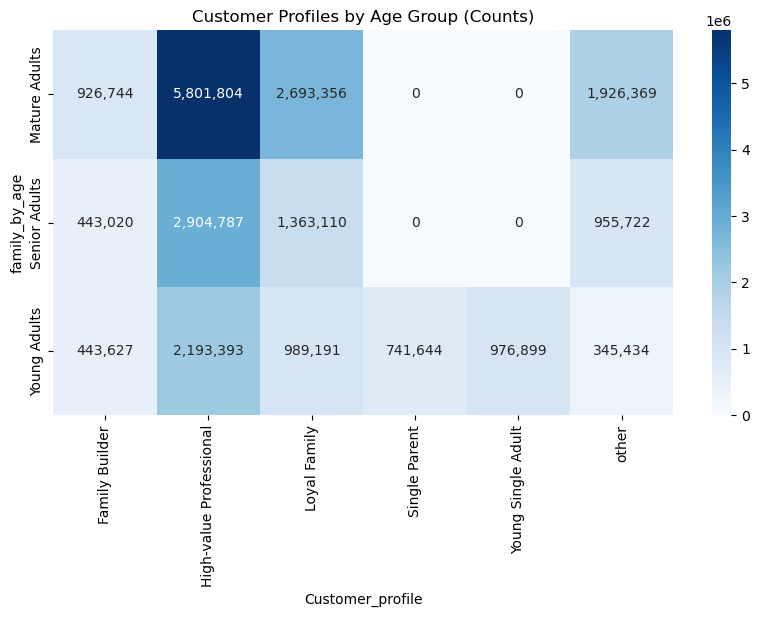

In [53]:
ct_counts = pd.crosstab(POC4['family_by_age'],
                        POC4['customer_profile'])
plt.figure(figsize=(10,5))
sns.heatmap(ct_counts, fmt=',', annot=True, cmap='Blues')
plt.title('Customer Profiles by Age Group (Counts)')
plt.ylabel('family_by_age')
plt.xlabel('Customer_profile')
plt.show()